Valid for ping 0.24.2 (18/10/2024)
### Load data

In [1]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import themachinethatgoesping as Ping

# data folder
folder = r'C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD'

# list raw data files
files = Ping.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
cache_files = Ping.echosounders.index_functions.get_cache_file_paths(files)
fh = Ping.echosounders.kongsbergall.KongsbergAllFileHandler(files,cache_files,init=True)

# get pings that contain WCD
pings = Ping.pingprocessing.filter_pings.by_features(fh.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = Ping.pingprocessing.widgets.WCIViewer(pings)

Found 8 files
indexing files ⢀ 99% :00s<00m:00s] [Found: 7463 datagrams in 8 files (258MB)]                                          
Initializing datagramdata interface ⠈ 0% :00s<00m:00s]           
Initializing ping interface ⢀ 75% :00s<00m:00s] [Done]                                              


### Get WCD

num beams: 256, num samples: 1744


Text(0.5, 1.0, 'first ping full WCD, flat view')

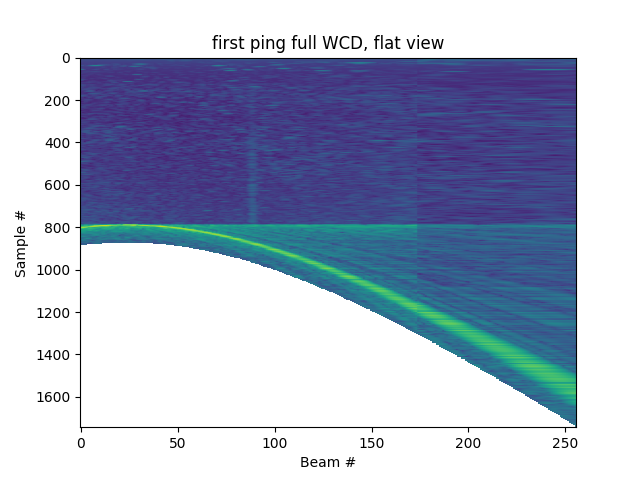

In [2]:
# Get the WCD from the first ping
image = pings[0].watercolumn.get_av()
# output is a beam x samples numpy array
print(f"num beams: {np.shape(image)[0]}, num samples: {np.shape(image)[1]}")

# display
fig1,ax1 = Ping.pingprocessing.core.create_figure('wci') # we transpose the image for display purposes
ax1.imshow(image.transpose(),aspect='auto')
ax1.set_xlabel('Beam #')
ax1.set_ylabel('Sample #')
ax1.set_title('first ping full WCD, flat view')

### WCD data subselection

Text(0.5, 1.0, 'first ping WCD, flat view, selected beams')

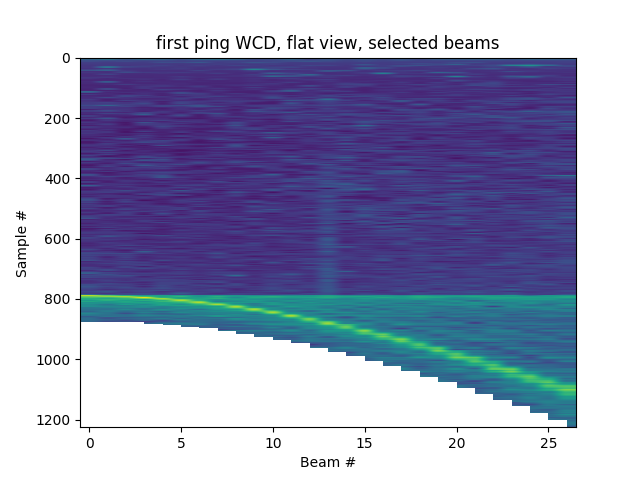

No such comm: e25f579de872481d9e30247dd2ef7050
No such comm: e25f579de872481d9e30247dd2ef7050
No such comm: e25f579de872481d9e30247dd2ef7050
No such comm: e25f579de872481d9e30247dd2ef7050
No such comm: e25f579de872481d9e30247dd2ef7050


In [3]:
# We can specify the data we want, using a pingsampleselector 
pss = Ping.echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-45,0,5) # min angle, max angle, stepsize in degrees. Other selection options are available

# apply the ping selector for beam x sample data
bs = pss.apply_selection(pings[0].watercolumn)
image = pings[0].watercolumn.get_av(bs)

# display
fig2,ax2 = Ping.pingprocessing.core.create_figure('wci') # we transpose the image for display purposes
ax2.imshow(image.transpose(),aspect='auto')
ax2.set_xlabel('Beam #')
ax2.set_ylabel('Sample #')
ax2.set_title('first ping WCD, flat view, selected beams')